In [71]:
import numpy as np
from itertools import product
import pandas as pd

## Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

n=5 - число вопросов

p = 1/4 - число угадать ответ

q = 3/4 - число неправильных ответов

k = 1

Принимаемые значения данной случайной величины будут:

x1 = 0 => (3/4)^5  * (1/4)^0 = 243/1024 =0.237

x2 = 1 => (3/4)^4  * (1/4)^1 * 5 = 405/1024= 0.396

x3 = 2 => (3/4)^3  * (1/4)^2 * 10 = 27/64 * 10/16 =270/1024 = 0.263

x4 = 3 => (3/4)^2  * (1/4)^3 * 10 = 9/16 * 10/64 = 90/1024 = 0.0878

x5 = 4 => (3/4)^1  * (1/4)^4 *5 = 3/4 * 5/256 = 15/1024 = 0.0146

x6 = 5 => (3/4)^0  * (1/4)^5 = 1/1024 = 0.00097

Математическое ожидание
5 * 0,25 = 1,25
Дисперсия такой величины:
5 * 0.25 * (1 - 0.25) = 1.25 * 0.75 = 0.937


In [72]:
pairs = list(product(range(1, 4), repeat = 5))
pairs [:5]

[(1, 1, 1, 1, 1),
 (1, 1, 1, 1, 2),
 (1, 1, 1, 1, 3),
 (1, 1, 1, 2, 1),
 (1, 1, 1, 2, 2)]

In [73]:
probabilities = np.ones(len(pairs)) / 4
probabilities[:5]

array([0.25, 0.25, 0.25, 0.25, 0.25])

In [74]:
values = list(map(sum,pairs))
values[:5]

[5, 6, 7, 6, 7]

In [75]:
z = pd.DataFrame({'value': values, 'probability': probabilities})
z.head(5)

,value,probability
0,5,0.25
1,6,0.25
2,7,0.25
3,6,0.25
4,7,0.25


In [76]:
z_probabilities = z.groupby('value')['probability'].sum()
z_probabilities

value
5      0.25
6      1.25
7      3.75
8      7.50
9     11.25
10    12.75
11    11.25
12     7.50
13     3.75
14     1.25
15     0.25
Name: probability, dtype: float64

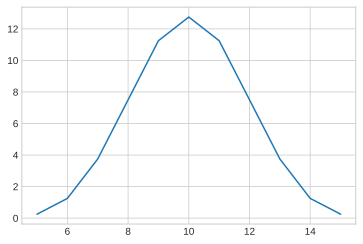

In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

plt.plot(z_probabilities)

## Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

l=10

Вероятность что спам писем придет не более 10 составит 33%

In [86]:
def poisson_proba(k: int, lambda_: float) -> float:
    return(lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [87]:
lambda_ = 10


In [88]:
poisson_proba(k=10, lambda_=lambda_)

0.1251100357211333

In [89]:
sum(poisson_proba(k=i, lambda_=lambda_)for i in range(9))

0.33281967875071894

## Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

0.01 - вероятность попадания
0.99 - вероятность промаха

Вероятность успеха должна быть >=0.9
Вероятность провала должна составлять не более 0.1

0.99^230 = 0.0991 - Вероятность промаха при одном высттреле
230 * 6 = 1360 - патронов необходимо чтобы поразить цель 6 раз